In [19]:
using Distributions
using StatsPlots
using StatsBase
using Turing

using Logging
using LaTeXStrings

using StatRethink

Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

Code 3.2

In [3]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);

Code 3.3

In [9]:
samples_count = 10_000
cat = Categorical(posterior);
indices = rand(cat, samples_count)
samples = p_grid[indices];

Code 3.4

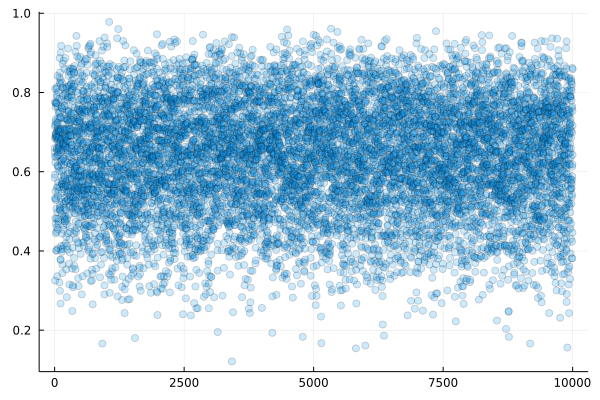

In [5]:
scatter(samples; alpha=0.2, legend=false)

Code 3.5

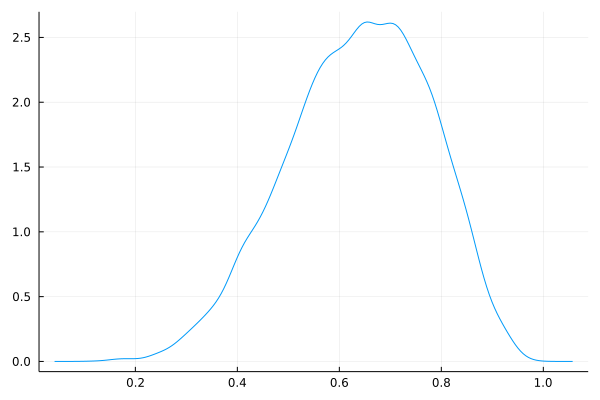

In [6]:
density(samples; legend=false)

Code 3.6

In [11]:
sum(posterior[p_grid .< 0.5])

0.17187458902022867

Code 3.7

In [10]:
sum(samples .< 0.5) / samples_count

0.1711

Code 3.8

In [13]:
sum((samples .> 0.5) .& (samples .< 0.75)) / samples_count

0.605

Code 3.9

In [14]:
quantile(samples, 0.8)

0.7599599599599598

Code 3.10

In [15]:
quantile(samples, [0.1, 0.9])

2-element Array{Float64,1}:
 0.44744744744744747
 0.8118118118118118

Code 3.11

In [16]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(3, p), 3) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior)

samples_count = 10_000
cat = Categorical(posterior);
samples = p_grid[rand(cat, samples_count)];

Code 3.12

In [18]:
percentile(samples, 25), percentile(samples, 75)

(0.7117117117117117, 0.9319319319319319)

Code 3.13

In [20]:
hpdi(samples, alpha=0.5)

2-element Array{Float64,1}:
 0.8448448448448449
 1.0